In [1]:
import numpy as np, pandas as pd

!date
!whoami

Tue Apr  4 17:35:36 PDT 2023
zmbc


# Find data

In [2]:
output_dir = '/ihme/scratch/users/zmbc/vivarium_results/united_states_of_america/2023_04_04_16_18_30/final_results/2023_04_04_17_30_18/'

!ls -lh $output_dir

total 32K
drwxrwxr-x 2 zmbc Domain Users 512 Apr  4 17:33 decennial_census_observer
drwxrwxr-x 2 zmbc Domain Users 512 Apr  4 17:33 household_survey_observer_acs
drwxrwxr-x 2 zmbc Domain Users 512 Apr  4 17:34 household_survey_observer_cps
drwxrwxr-x 2 zmbc Domain Users 512 Apr  4 17:34 social_security_observer
drwxrwxr-x 2 zmbc Domain Users 512 Apr  4 17:34 tax_1040_observer
drwxrwxr-x 2 zmbc Domain Users 512 Apr  4 17:34 tax_dependents_observer
drwxrwxr-x 2 zmbc Domain Users 512 Apr  4 17:34 tax_w2_observer
drwxrwxr-x 2 zmbc Domain Users 512 Apr  4 17:34 wic_observer


In [3]:
# Unsurprisingly, most of the data is in taxes
!du -sh $output_dir/* | sort -h -r

7.6M	/ihme/scratch/users/zmbc/vivarium_results/united_states_of_america/2023_04_04_16_18_30/final_results/2023_04_04_17_30_18//tax_w2_observer
3.3M	/ihme/scratch/users/zmbc/vivarium_results/united_states_of_america/2023_04_04_16_18_30/final_results/2023_04_04_17_30_18//tax_1040_observer
1.1M	/ihme/scratch/users/zmbc/vivarium_results/united_states_of_america/2023_04_04_16_18_30/final_results/2023_04_04_17_30_18//tax_dependents_observer
932K	/ihme/scratch/users/zmbc/vivarium_results/united_states_of_america/2023_04_04_16_18_30/final_results/2023_04_04_17_30_18//decennial_census_observer
452K	/ihme/scratch/users/zmbc/vivarium_results/united_states_of_america/2023_04_04_16_18_30/final_results/2023_04_04_17_30_18//social_security_observer
208K	/ihme/scratch/users/zmbc/vivarium_results/united_states_of_america/2023_04_04_16_18_30/final_results/2023_04_04_17_30_18//wic_observer
128K	/ihme/scratch/users/zmbc/vivarium_results/united_states_of_america/2023_04_04_16_18_30/final_results/2023_04_04

In [4]:
!ls -lh $output_dir/decennial_census_observer

total 928K
-rwxr-xr-x 1 zmbc Domain Users 923K Apr  4 17:33 decennial_census_observer.hdf


# Load decennial Census

In [5]:
%%time

df_census = pd.read_hdf(f'{output_dir}/decennial_census_observer/decennial_census_observer.hdf')
df_census

CPU times: user 416 ms, sys: 55 ms, total: 471 ms
Wall time: 503 ms


,street_number,middle_initial,last_name,sex,guardian_1,year,housing_type,city,race_ethnicity,relation_to_household_head,age,unit_number,date_of_birth,first_name,street_name,simulant_id,guardian_2,zipcode,state
0,1312,M,Shipp,Female,0_-1,2020,Standard,Anytown,Black,Reference person,76,,1944-03-23,Maureen,commonwealth avnue,0_4,0_-1,99999,US
1,1312,N,Shipp,Male,0_-1,2020,Standard,Anytown,Black,Opp-sex spouse,69,,1951-03-05,Richard,commonwealth avnue,0_5,0_-1,99999,US
2,46,C,Holt,Female,0_-1,2020,Standard,Anytown,Black,Reference person,66,,1953-08-03,Darlene,bancroft st,0_2464,0_-1,99999,US
3,9112,S,Holt,Female,0_-1,2020,Standard,Anytown,Black,Reference person,42,,1977-05-22,Tabatha,janis ne,0_3558,0_-1,99999,US
4,9112,M,Holt,Female,0_-1,2020,Standard,Anytown,Black,Biological child,25,,1994-12-16,Alice,janis ne,0_3559,0_-1,99999,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19949,5700,S,Wasser,Male,0_-1,2030,Standard,Anytown,White,Reference person,66,,1963-09-21,John,n cr 400 e,0_17995,0_-1,99999,US
19950,21,K,Hughes,Male,0_-1,2030,Standard,Anytown,Black,Reference person,77,,1952-10-15,Clyde,mammoth springs dr,0_18073,0_-1,99999,US
19951,8728,C,Walker,Female,0_14366,2030,Standard,Anytown,Black,Reference person,2,,2027-11-11,Stephanie,high pine meadows r,0_22588,0_-1,99999,US
19952,1900,D,Foster,Male,0_-1,2030,Standard,Anytown,White,Reference person,23,,2006-10-10,Austin,ranch loop,0_22759,0_-1,99999,US


In [6]:
df_census.isnull().any().any()

False

In [7]:
# Nobody counted twice in a single census
assert (df_census.groupby(['year', 'simulant_id']).size() == 1).all()

In [8]:
df_census.city.value_counts(dropna=False)

Anytown    19954
Name: city, dtype: int64

In [9]:
df_census.state.value_counts(dropna=False)

US    19954
Name: state, dtype: int64

In [10]:
df_census.zipcode.value_counts(dropna=False)

99999    19954
Name: zipcode, dtype: int64

<AxesSubplot:>

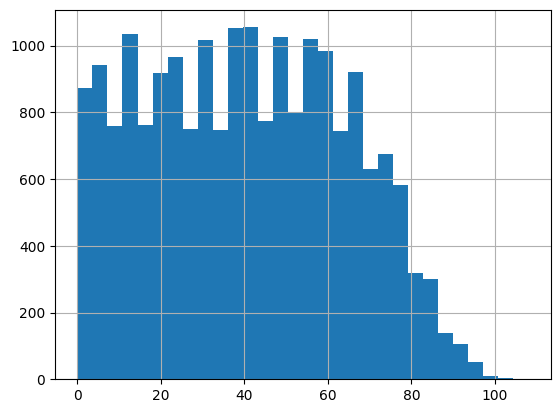

In [11]:
df_census.age.hist(bins=30)

In [12]:
df_census.race_ethnicity.value_counts() / len(df_census)

White                   0.606796
Latino                  0.175353
Black                   0.119375
Asian                   0.060389
Multiracial or Other    0.031523
AIAN                    0.004761
NHOPI                   0.001804
Name: race_ethnicity, dtype: float64

In [13]:
df_census.sex.value_counts() / len(df_census)

Female    0.519495
Male      0.480505
Name: sex, dtype: float64

In [14]:
(df_census.first_name + ' ' + df_census.last_name).value_counts(dropna=False)

Thomas Smith      7
John Brown        6
William Martin    6
William Rogers    6
Anthony Davis     5
                 ..
Brenda Jonas      1
Elizabeth Duke    1
Gage Reichert     1
Kaylee Emery      1
Chandler Smith    1
Length: 14075, dtype: int64

In [15]:
(df_census.first_name + ' ' + df_census.middle_initial + ' ' + df_census.last_name).value_counts(dropna=False)

William G Rogers        5
Amy K Hernandez         4
William G Martin        4
Natalie A Lima          4
Christopher J Knight    4
                       ..
Ryan E Nunez            1
Steven J Nunez          1
Sarah J Nunez           1
Noah J Montez           1
Chandler E Smith        1
Length: 14203, dtype: int64

In [16]:
(df_census.street_number + ' ' + df_census.street_name).value_counts(dropna=False)

501 lake stream dr       363
1700 union brick road     23
706 forrest ln            20
8534 taylor st s          18
 e green mdws rd          18
                        ... 
10 eastland parkway        1
1424 mcclellan road        1
340 s sunset view dr       1
163 ingraham rd            1
1010 ozark vy la           1
Length: 6838, dtype: int64

In [17]:
df_census.unit_number.value_counts()

                   18907
g f                   15
apartment 1           12
apartamiento 89       12
lot # 104             12
                   ...  
apt 428                1
aptmnt 2               1
aprt a                 1
unt j6                 1
ap 525                 1
Name: unit_number, Length: 344, dtype: int64

In [18]:
df_census.relation_to_household_head.value_counts()

Reference person               8768
Biological child               4223
Opp-sex spouse                 2487
Other nonrelative              1886
Grandchild                      489
Institutionalized GQ pop        363
Other relative                  349
Opp-sex partner                 344
Roommate                        250
Sibling                         241
Parent                          159
Stepchild                       156
Adopted child                    80
Child-in-law                     54
Same-sex spouse                  41
Parent-in-law                    33
Same-sex partner                 22
Foster child                      9
Noninstitutionalized GQ pop       0
Name: relation_to_household_head, dtype: int64

### GQ

In [19]:
df_census.housing_type.value_counts()

Standard                   19591
Carceral                     363
Nursing home                   0
Other institutional            0
College                        0
Military                       0
Other non-institutional        0
Name: housing_type, dtype: int64

In [20]:
df_census[(df_census.street_number == '501') & (df_census.street_name == 'lake stream dr')].housing_type.value_counts()

Carceral                   363
Standard                     0
Nursing home                 0
Other institutional          0
College                      0
Military                     0
Other non-institutional      0
Name: housing_type, dtype: int64

In [21]:
# Trying to figure out whether census is getting any people who have died -- it doesn't look like it
# (the up to a year of error is due to the rounding down of age)
(df_census.year - (df_census.date_of_birth.dt.year + df_census.age)).sort_values()

0        0
9250     0
9247     0
9245     0
9244     0
        ..
9514     1
9515     1
9516     1
2571     1
19953    1
Length: 19954, dtype: int64

## Overlap between consecutive Censuses

This is probably too little overlap, but close enough? Definitely enough for a meaningful PRL exercise.

In [22]:
df_census.groupby('year').size()

year
2020    9979
2030    9975
dtype: int64

In [23]:
df_census[df_census.year == 2030].assign(in_2020_census=lambda df: df.simulant_id.isin(df_census[df_census.year == 2020].simulant_id)).in_2020_census.value_counts(dropna=False)

True     5703
False    4272
Name: in_2020_census, dtype: int64

### GQ

In [24]:
gq_census = df_census[df_census.housing_type != 'Standard']

In [25]:
gq_census[gq_census.year == 2030].assign(in_2020_census=lambda df: df.simulant_id.isin(gq_census[gq_census.year == 2020].simulant_id)).in_2020_census.value_counts(dropna=False)

False    222
True      43
Name: in_2020_census, dtype: int64

# Household surveys

In [26]:
%%time

df_acs = pd.read_hdf(f'{output_dir}/household_survey_observer_acs/household_survey_observer_acs.hdf')
df_acs

CPU times: user 52.4 ms, sys: 116 µs, total: 52.5 ms
Wall time: 56.5 ms


,street_number,middle_initial,last_name,sex,guardian_1,housing_type,household_id,city,age,unit_number,date_of_birth,survey_date,first_name,street_name,simulant_id,guardian_2,zipcode,state
0,5,R,Gandy,Male,0_-1,Standard,0_7661,Anytown,48,,1971-05-20,2020-04-29,Curtis,nw 18th pl,0_18951,0_-1,99999,US
1,5,C,Gandy,Female,0_-1,Standard,0_7661,Anytown,43,,1976-04-01,2020-04-29,Patricia,nw 18th pl,0_18952,0_-1,99999,US
2,5,J,Gandy,Male,0_18951,Standard,0_7661,Anytown,11,,2008-09-20,2020-04-29,Ashton,nw 18th pl,0_18953,0_18952,99999,US
3,5,C,Pratt,Male,0_-1,Standard,0_7661,Anytown,14,,2005-06-21,2020-04-29,Joshua,nw 18th pl,0_18954,0_-1,99999,US
4,4501,I,Miller,Female,0_-1,Standard,0_4653,Anytown,66,,1953-07-15,2020-06-24,Joan,brown e end rd,0_11498,0_-1,99999,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,,C,Herman,Female,0_-1,Standard,0_4258,Anytown,60,,1969-07-14,2029-12-26,Renee,valencia ave,0_10501,0_-1,99999,US
138,,C,Herman,Male,0_-1,Standard,0_4258,Anytown,61,,1968-07-21,2029-12-26,Ricky,valencia ave,0_10502,0_-1,99999,US
139,5309,C,Larsen,Female,0_-1,Standard,0_4529,Anytown,64,,1965-08-30,2030-01-23,Dee,westport pkwy,0_11185,0_-1,99999,US
140,30419,B,Bracy,Male,0_-1,Standard,0_4313,Anytown,35,,1994-06-02,2030-04-17,David,w capitol dr,0_6599,0_-1,99999,US


In [27]:
assert not df_acs.isnull().any().any()

In [28]:
df_acs.survey_date.value_counts()

2027-12-29    7
2027-08-11    6
2021-02-03    5
2020-04-29    4
2028-02-23    4
             ..
2025-11-05    1
2025-09-10    1
2025-08-13    1
2025-07-16    1
2025-10-08    1
Name: survey_date, Length: 69, dtype: int64

In [29]:
assert (df_acs.city == 'Anytown').all()
assert (df_acs.state == 'US').all()
assert (df_acs.zipcode == '99999').all()

<AxesSubplot:>

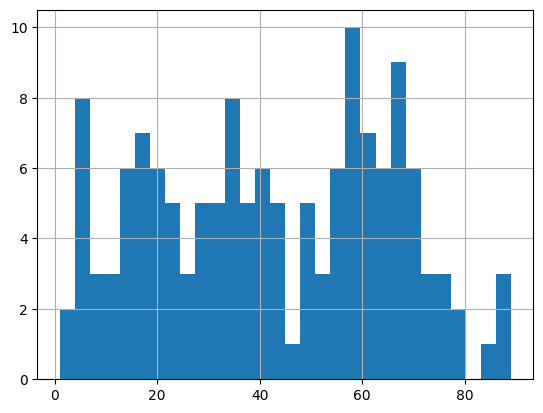

In [30]:
df_acs.age.hist(bins=30)

In [31]:
df_acs.sex.value_counts() / len(df_acs)

Female    0.56338
Male      0.43662
Name: sex, dtype: float64

In [32]:
# Trying to figure out whether these are surveying any people who have died -- it doesn't look like it
# It looks like survey_date is always one timestep early, though
# (the up to a year of error is due to the rounding down of age)
(df_acs.survey_date - (df_acs.date_of_birth + pd.to_timedelta(df_acs.age * 365.25, unit='D'))).sort_values()

67     28 days 12:00:00
33     29 days 06:00:00
111    35 days 00:00:00
64     35 days 12:00:00
122    37 days 06:00:00
             ...       
115   383 days 06:00:00
60    384 days 18:00:00
25    388 days 00:00:00
120   391 days 12:00:00
1     393 days 06:00:00
Length: 142, dtype: timedelta64[ns]

In [33]:
%%time

df_cps = pd.read_hdf(f'{output_dir}/household_survey_observer_cps/household_survey_observer_cps.hdf')
df_cps

CPU times: user 117 ms, sys: 14.5 ms, total: 131 ms
Wall time: 137 ms


,street_number,middle_initial,last_name,sex,guardian_1,housing_type,household_id,city,age,unit_number,date_of_birth,survey_date,first_name,street_name,simulant_id,guardian_2,zipcode,state
0,2725,A,Bergdahl,Male,0_-1,Standard,0_1191,Anytown,29,,1990-05-25,2020-04-29,Derrick,clifton str,0_2902,0_-1,99999,US
1,2725,C,Bergdahl,Female,0_-1,Standard,0_1191,Anytown,36,,1983-08-04,2020-04-29,Victoria,clifton str,0_2903,0_-1,99999,US
2,2725,R,Bergdahl,Male,0_2902,Standard,0_1191,Anytown,5,,2014-08-29,2020-04-29,Stephen,clifton str,0_2904,0_2903,99999,US
3,1606,A,Aparicio,Female,0_-1,Standard,0_6133,Anytown,28,,1991-11-24,2020-04-29,Alexis,schillinger rd n,0_15122,0_-1,99999,US
4,129,M,Tejeda,Male,0_-1,Standard,0_6766,Anytown,53,apt # 284l,1966-09-09,2020-04-29,Howard,dodds rd,0_16685,0_-1,99999,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,1134,L,Michalski,Female,0_-1,Standard,0_9060,Anytown,77,,1952-12-17,2030-04-17,Connie,ocean ave,0_16563,0_-1,99999,US
894,4,T,Kelley,Female,0_-1,Standard,0_1279,Anytown,48,,1982-01-16,2030-05-15,Sara,mcculloch,0_3135,0_-1,99999,US
895,4,A,Kelley,Male,0_-1,Standard,0_1279,Anytown,46,,1983-10-14,2030-05-15,Robert,mcculloch,0_3136,0_-1,99999,US
896,4,L,Kelley,Male,0_3135,Standard,0_1279,Anytown,14,,2015-08-05,2030-05-15,Franklin,mcculloch,0_3137,0_3136,99999,US


In [34]:
assert df_cps.notnull().all().all()
assert (df_cps.city == 'Anytown').all()
assert (df_cps.state == 'US').all()
assert (df_cps.zipcode == '99999').all()

In [35]:
# These surveys are both small and shouldn't overlap much
df_cps.simulant_id.isin(df_acs.simulant_id).value_counts()

False    889
True       9
Name: simulant_id, dtype: int64

In [36]:
df_cps.simulant_id[df_cps.simulant_id.isin(df_acs.simulant_id)]

86       0_188
213    0_11292
278    0_12620
349     0_1955
350     0_1956
431     0_7110
432     0_7111
433     0_7112
603    0_14044
Name: simulant_id, dtype: object

### Check that someone sampled for both was on different timesteps

In [37]:
df_acs[df_acs.simulant_id == '0_188'].survey_date

131   2029-06-13
Name: survey_date, dtype: datetime64[ns]

In [38]:
df_cps[df_cps.simulant_id == '0_188'].survey_date

86   2020-11-11
Name: survey_date, dtype: datetime64[ns]

# SSA

In [39]:
%%time

df_ssa = pd.read_hdf(f'{output_dir}/social_security_observer/social_security_observer.hdf')
df_ssa

CPU times: user 147 ms, sys: 12.4 ms, total: 159 ms
Wall time: 163 ms


,date_of_birth,middle_initial,first_name,last_name,simulant_id,ssn,event_date,event_type
0,1922-02-23,D,Margaret,Obar,0_16801,786-77-6454,1922-02-23,creation
1,1922-07-17,A,Edna,Austin,0_18069,688-88-6377,1922-07-17,creation
3,1922-10-15,D,Josephine,Keath,0_7245,665-25-7858,1922-10-15,creation
7,1923-08-11,D,Joan,Menchaca-Silva,0_6068,102-60-0838,1923-08-11,creation
8,1923-08-21,M,Mary,Moore,0_4393,494-11-1947,1923-08-21,creation
...,...,...,...,...,...,...,...,...
24633,1955-08-07,E,Thomas,Green,0_9164,104-19-7348,2030-05-15,death
24634,1956-02-12,D,Patricia,Theiss,0_19164,874-32-8890,2030-05-15,death
24635,1959-05-27,K,Rhonda,Mcgraw,0_16742,864-04-0094,2030-05-15,death
24636,1976-03-22,J,Gerald,Disalvo,0_18457,564-95-5073,2030-05-15,death


In [40]:
assert df_ssa.notnull().all().all()

In [41]:
df_ssa.event_type.value_counts()

creation    15234
death        1242
Name: event_type, dtype: int64

In [42]:
# 1-to-1 between simulants and SSNs
assert (df_ssa.groupby('simulant_id').ssn.nunique() == 1).all()
assert (df_ssa.groupby('ssn').simulant_id.nunique() == 1).all()

In [43]:
(df_ssa.first_name + ' ' + df_ssa.middle_initial + ' ' + df_ssa.last_name).value_counts(dropna=False)

Charles S Berrier     4
Edith A Campbell      4
William G Rogers      3
William D Edwards     3
Ann J Smith           3
                     ..
Jeffery R Eastlund    1
Amanda M Wilson       1
Catherine R Jones     1
Alyssa J Pope         1
Ava M Lint            1
Length: 15177, dtype: int64

In [44]:
# Weird that this would be the name with two people in it! Though it makes sense that it's an old-timey one,
# since that increases the chance of having a death record
df_ssa[(df_ssa.first_name + ' ' + df_ssa.middle_initial + ' ' + df_ssa.last_name) == 'Charles S Berrier']

,date_of_birth,middle_initial,first_name,last_name,simulant_id,ssn,event_date,event_type
249,1932-12-07,S,Charles,Berrier,0_15159,867-26-2008,1932-12-07,creation
269,1933-05-17,S,Charles,Berrier,0_10282,244-08-0619,1933-05-17,creation
19653,1933-05-17,S,Charles,Berrier,0_10282,244-08-0619,2021-01-06,death
20062,1932-12-07,S,Charles,Berrier,0_15159,867-26-2008,2021-11-10,death


In [45]:
df_census[(df_census.first_name + ' ' + df_census.middle_initial + ' ' + df_census.last_name) == 'Charles S Berrier']

,street_number,middle_initial,last_name,sex,guardian_1,year,housing_type,city,race_ethnicity,relation_to_household_head,age,unit_number,date_of_birth,first_name,street_name,simulant_id,guardian_2,zipcode,state
17835,108,S,Berrier,Male,0_-1,2020,Standard,Anytown,White,Reference person,86,,1933-05-17,Charles,n nob hill rd,0_10282,0_-1,99999,US
18562,6625,S,Berrier,Male,0_-1,2020,Standard,Anytown,White,Opp-sex spouse,87,,1932-12-07,Charles,moriches rd,0_15159,0_-1,99999,US


<AxesSubplot:>

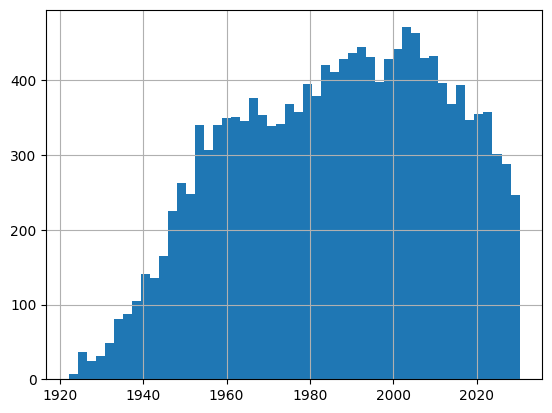

In [46]:
df_ssa[df_ssa.event_type == 'creation'].date_of_birth.hist(bins=50)

In [47]:
# Immigrants
df_ssa[df_ssa.event_type == 'creation'][df_ssa[df_ssa.event_type == 'creation'].event_date != df_ssa[df_ssa.event_type == 'creation'].date_of_birth]

,date_of_birth,middle_initial,first_name,last_name,simulant_id,ssn,event_date,event_type
19328,1965-01-30,S,Yvonne,Roll,0_20062,373-20-1671,2020-04-29,creation
19329,1965-07-09,T,George,Roll,0_20061,178-31-2910,2020-04-29,creation
19334,1993-04-30,B,Matthew,Colorado,0_20059,669-50-4221,2020-04-29,creation
19335,1998-07-26,E,Christofer,Gullette,0_20063,886-58-4150,2020-04-29,creation
19337,2018-07-03,E,Caleb,Hill,0_20057,162-67-5008,2020-04-29,creation
...,...,...,...,...,...,...,...,...
24572,2030-03-25,A,Eevee,Speer,0_23427,268-47-9256,2030-03-20,creation
24574,2030-03-30,J,Lily,Stibbe,0_23424,214-16-7088,2030-03-20,creation
24575,2030-03-31,M,Alani,Andrade,0_23415,193-80-5960,2030-03-20,creation
24576,2030-04-01,A,Olivia,Moles,0_23419,742-47-6307,2030-03-20,creation


# 1040

In [48]:
%%time

df_1040 = pd.read_hdf(f'{output_dir}/tax_1040_observer/tax_1040_observer.hdf')
df_1040

CPU times: user 1.96 s, sys: 171 ms, total: 2.13 s
Wall time: 2.14 s


,mailing_address_unit_number,middle_initial,last_name,mailing_address_street_number,mailing_address_city,mailing_address_state,housing_type,mailing_address_zipcode,age,date_of_birth,first_name,mailing_address_street_name,mailing_address_po_box,joint_filer,simulant_id,ssn,tax_year,itin
0,,M,Shipp,1312,Anytown,US,Standard,99999,76,1944-03-23,Maureen,commonwealth avnue,0,False,0_4,828-99-4653,2019,NaN
1,,N,Shipp,1312,Anytown,US,Standard,99999,69,1951-03-05,Richard,commonwealth avnue,0,True,0_5,885-38-0858,2019,NaN
2,,C,Holt,46,Anytown,US,Standard,99999,66,1953-08-03,Darlene,bancroft st,0,False,0_2464,584-19-7087,2019,NaN
3,,S,Holt,9112,Anytown,US,Standard,99999,42,1977-05-22,Tabatha,janis ne,0,False,0_3558,813-32-2963,2019,NaN
4,,M,Holt,9112,Anytown,US,Standard,99999,25,1994-12-16,Alice,janis ne,0,False,0_3559,607-79-1610,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116312,,B,Rubio,2569,Anytown,US,Standard,99999,13,2016-05-01,Michael,ocean avenue,0,False,0_12669,088-27-8587,2029,NaN
116313,,K,Rubio,2569,Anytown,US,Standard,99999,27,2002-09-20,Alana,ocean avenue,0,False,0_12670,028-47-6626,2029,NaN
116314,,C,Rubio,2569,Anytown,US,Standard,99999,26,2004-01-12,Emily,ocean avenue,0,False,0_12671,796-80-2013,2029,NaN
116315,,B,Rubio,2569,Anytown,US,Standard,99999,9,2020-08-28,Joaquin,ocean avenue,0,False,0_20143,482-54-0254,2029,NaN


In [49]:
df_1040.isnull().any()

mailing_address_unit_number      False
middle_initial                   False
last_name                        False
mailing_address_street_number    False
mailing_address_city             False
mailing_address_state            False
housing_type                     False
mailing_address_zipcode          False
age                              False
date_of_birth                    False
first_name                       False
mailing_address_street_name      False
mailing_address_po_box           False
joint_filer                      False
simulant_id                      False
ssn                               True
tax_year                         False
itin                              True
dtype: bool

In [50]:
df_1040.mailing_address_po_box.value_counts()

0        112430
18690        66
11295        64
411          61
10270        55
          ...  
3062          1
17194         1
13250         1
57            1
14658         1
Name: mailing_address_po_box, Length: 255, dtype: int64

In [51]:
df_1040[df_1040.itin.notnull()]

,mailing_address_unit_number,middle_initial,last_name,mailing_address_street_number,mailing_address_city,mailing_address_state,housing_type,mailing_address_zipcode,age,date_of_birth,first_name,mailing_address_street_name,mailing_address_po_box,joint_filer,simulant_id,ssn,tax_year,itin
183,,J,Hernandez,189-36,Anytown,US,Standard,99999,18,2001-11-17,Caroline,eagles nest tr,0,False,0_15581,NaN,2019,937-61-6268
198,,J,Hernandez,189-36,Anytown,US,Standard,99999,19,2001-11-17,Caroline,eagles nest tr,0,False,0_15581,NaN,2020,937-61-6268
213,,J,Hernandez,189-36,Anytown,US,Standard,99999,20,2001-11-17,Caroline,eagles nest tr,0,False,0_15581,NaN,2021,937-61-6268
228,,J,Hernandez,189-36,Anytown,US,Standard,99999,21,2001-11-17,Caroline,eagles nest tr,0,False,0_15581,NaN,2022,937-61-6268
243,,J,Hernandez,189-36,Anytown,US,Standard,99999,22,2001-11-17,Caroline,eagles nest tr,0,False,0_15581,NaN,2023,937-61-6268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116146,,E,Olmeda,1762,Anytown,US,Standard,99999,30,1998-12-19,Zachary,prairie rn street,0,False,0_21077,NaN,2028,957-70-1302
116149,,E,Olmeda,1762,Anytown,US,Standard,99999,31,1998-12-19,Zachary,prairie rn street,0,False,0_21077,NaN,2029,957-70-1302
116278,,J,Gonzalez,11934,Anytown,US,Standard,99999,65,1962-04-19,Eileen,main st w,0,False,0_17283,NaN,2027,997-92-3575
116287,,J,Gonzalez,11934,Anytown,US,Standard,99999,66,1962-04-19,Eileen,main st w,0,False,0_17283,NaN,2028,997-92-3575


In [52]:
assert df_1040[df_1040.itin.notnull()].ssn.isnull().all()

In [53]:
assert (df_1040.mailing_address_city == 'Anytown').all()
assert (df_1040.mailing_address_state == 'US').all()
assert (df_1040.mailing_address_zipcode == '99999').all()

## Overlap between consecutive tax years

In [54]:
df_1040.tax_year.value_counts(dropna=False)

2029    11160
2028    11063
2027    10974
2026    10860
2025    10735
2024    10525
2023    10381
2022    10337
2021    10213
2020    10083
2019     9986
Name: tax_year, dtype: int64

In [55]:
df_1040[df_1040.tax_year == 2028].assign(in_2027_taxes=lambda df: df.simulant_id.isin(df_1040[df_1040.tax_year == 2027].simulant_id)).in_2027_taxes.value_counts(dropna=False)

True     10429
False      634
Name: in_2027_taxes, dtype: int64

## Why does taxes have more rows than Census?

I think because it is including people who have died, and does not implement the minimum income for filing (!).

In [56]:
df_1040[df_1040.tax_year == 2029].simulant_id.is_unique

True

In [57]:
not_in_census = df_1040[(df_1040.tax_year == 2029) & (~df_1040.simulant_id.isin(df_census[df_census.year == 2030].simulant_id))]
(pd.to_datetime(not_in_census.date_of_birth).dt.year + not_in_census.age).describe()

count    1185.000000
mean     2024.378059
std         2.894051
min      2019.000000
25%      2022.000000
50%      2025.000000
75%      2027.000000
max      2030.000000
dtype: float64

# Dependents

In [58]:
%%time

df_dependents = pd.read_hdf(f'{output_dir}/tax_dependents_observer/tax_dependents_observer.hdf')
df_dependents

CPU times: user 668 ms, sys: 20.4 ms, total: 688 ms
Wall time: 697 ms


,mailing_address_unit_number,middle_initial,last_name,sex,mailing_address_city,mailing_address_state,housing_type,mailing_address_zipcode,age,guardian_id,date_of_birth,first_name,mailing_address_street_name,mailing_address_po_box,simulant_id,ssn,tax_year,mailing_address_street_number
0,,C,Alvarado,Female,Anytown,US,Standard,99999,15,0_61,2005-07-03,Jessica,w altadena ave,0,0_64,248-44-4374,2020,2
1,,I,Cruz,Female,Anytown,US,Standard,99999,17,0_15783,2003-06-03,Rachel,ringenberg dr,0,0_15785,449-66-9438,2020,1328
2,,C,Alvarado,Female,Anytown,US,Standard,99999,15,0_62,2005-07-03,Jessica,w altadena ave,0,0_64,248-44-4374,2020,2
3,,I,Cruz,Female,Anytown,US,Standard,99999,17,0_15784,2003-06-03,Rachel,ringenberg dr,0,0_15785,449-66-9438,2020,1328
4,,C,Alvarado,Female,Anytown,US,Standard,99999,16,0_61,2005-07-03,Jessica,w altadena ave,0,0_64,248-44-4374,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39037,,R,Countryman,Male,Anytown,US,Standard,99999,4,0_16833,2025-02-07,Beau,summer pl,0,0_21636,571-45-8323,2029,5805
39038,,W,Countryman,Male,Anytown,US,Standard,99999,2,0_16833,2027-11-05,Noah,summer pl,0,0_22593,272-58-4297,2029,5805
39039,,Y,Graham,Female,Anytown,US,Standard,99999,3,0_10571,2026-11-22,Scarlett,cross rd,0,0_22241,565-81-4441,2029,6313
39040,,J,Howland,Female,Anytown,US,Standard,99999,0,0_22257,2029-04-03,Olive,miriam dr,0,0_23077,787-26-1454,2029,126


In [59]:
df_dependents.isnull().any()

mailing_address_unit_number      False
middle_initial                   False
last_name                        False
sex                              False
mailing_address_city             False
mailing_address_state            False
housing_type                     False
mailing_address_zipcode          False
age                              False
guardian_id                      False
date_of_birth                    False
first_name                       False
mailing_address_street_name      False
mailing_address_po_box           False
simulant_id                      False
ssn                               True
tax_year                         False
mailing_address_street_number    False
dtype: bool

<AxesSubplot:>

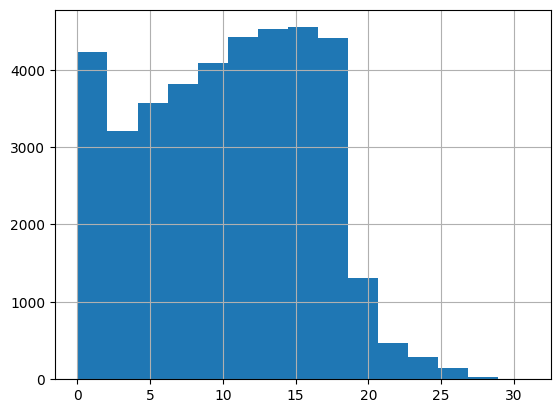

In [60]:
df_dependents.age.hist(bins=15)

In [61]:
assert (df_dependents.mailing_address_city == 'Anytown').all()
assert (df_dependents.mailing_address_state == 'US').all()
assert (df_dependents.mailing_address_zipcode == '99999').all()

# W2

In [62]:
%%time

df_w2 = pd.read_hdf(f'{output_dir}/tax_w2_observer/tax_w2_observer.hdf')
df_w2

CPU times: user 3.06 s, sys: 176 ms, total: 3.23 s
Wall time: 3.24 s


,mailing_address_unit_number,employer_street_number,middle_initial,income,last_name,tax_form,mailing_address_city,mailing_address_state,mailing_address_zipcode,employer_zipcode,...,simulant_id,employer_unit_number,employer_state,ssn,tax_year,employer_id,employer_name,employer_city,mailing_address_street_number,employer_street_name
0,,e,M,5889.171749,Shipp,W2,Anytown,US,99999,99999,...,0_4,,US,828-99-4653,2020,87,Transformation Center 3 Emergency Veterinary H...,Anytown,1312,ince dr
1,,,N,46085.842010,Shipp,W2,Anytown,US,99999,99999,...,0_5,,US,885-38-0858,2020,12,Jj Rubys Salon Studios,Anytown,1312,stoney crk cir
2,,65,C,26513.522956,Holt,W2,Anytown,US,99999,99999,...,0_2464,,US,584-19-7087,2020,57,ReStore and Yogurt Parlour Salon,Anytown,46,s west ave
3,,2329,S,20326.460457,Holt,W2,Anytown,US,99999,99999,...,0_3558,,US,813-32-2963,2020,36,Council of Taos Suby Repair,Anytown,9112,greenwood wy
4,,309,S,4719.617448,Holt,W2,Anytown,US,99999,99999,...,0_3558,,US,813-32-2963,2020,90,Northwell Health Center Inc,Anytown,9112,n 52nd st
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93300,,9641,C,5324.699057,Rubio,W2,Anytown,US,99999,99999,...,0_12671,,US,796-80-2013,2029,50,The Church of America,Anytown,2569,s cr 15 rd
93301,,4135,C,16390.413647,Rubio,W2,Anytown,US,99999,99999,...,0_12671,,US,796-80-2013,2029,100,Twin Boro Auto Repair Service (USPS),Anytown,2569,yarmont way
93302,,4946,K,13313.581513,Hughes,W2,Anytown,US,99999,99999,...,0_18073,,US,105-49-3492,2029,30,Warrensburg,Anytown,21,w bluebird pl
93303,,9641,K,18809.325345,Hughes,W2,Anytown,US,99999,99999,...,0_18073,,US,105-49-3492,2029,50,The Church of America,Anytown,21,s cr 15 rd


In [63]:
df_w2.columns

Index(['mailing_address_unit_number', 'employer_street_number',
       'middle_initial', 'income', 'last_name', 'tax_form',
       'mailing_address_city', 'mailing_address_state',
       'mailing_address_zipcode', 'employer_zipcode', 'age', 'date_of_birth',
       'first_name', 'mailing_address_street_name', 'mailing_address_po_box',
       'simulant_id', 'employer_unit_number', 'employer_state', 'ssn',
       'tax_year', 'employer_id', 'employer_name', 'employer_city',
       'mailing_address_street_number', 'employer_street_name'],
      dtype='object')

In [64]:
assert not df_w2.isnull().any().any()

In [65]:
df_w2.tax_form.value_counts()

W2      88256
1099     5049
Name: tax_form, dtype: int64

In [66]:
df_w2.employer_name.value_counts()

Transformation Center 3 Emergency Veterinary Hospital    5697
Adventist Church of Cartersville Animal Shltr Cre        4563
Twin Boro Auto Repair Service (USPS)                     4146
ReStore and Yogurt Parlour Salon                         3658
Greyhound                                                3066
                                                         ... 
Jj Rubys Salon Studios                                     84
FedEx                                                      82
Gershenzon DDS MHS                                         81
Gabriel's Liquor & Acting                                  68
Sunoco                                                     36
Name: employer_name, Length: 105, dtype: int64

In [67]:
# Military is not in GQ, correct?
df_w2[df_w2.employer_name == 'Military'].mailing_address_street_number.value_counts()

         22
270       8
172       7
2184      6
197       5
         ..
3839      1
9874      1
7044      1
8135      1
20203     1
Name: mailing_address_street_number, Length: 194, dtype: int64

In [68]:
# Street name is never missing unless it's a PO box
assert (df_w2[df_w2.mailing_address_street_name == ''].mailing_address_po_box != 0).all()

In [69]:
# There are a bunch of these addresses that have no street number, but they are rare
df_w2[
    (df_w2.mailing_address_street_number == '') &
    (df_w2.mailing_address_po_box == 0)
].pipe(lambda x: x.mailing_address_street_number + ' ' + x.mailing_address_street_name + ' ' + x.mailing_address_unit_number)

359               oak st 
360               oak st 
361               oak st 
375               oak st 
396               oak st 
               ...       
93160     s atlantic ave 
93161     s atlantic ave 
93162     s atlantic ave 
93229     wheeley circel 
93230     wheeley circel 
Length: 3515, dtype: object

In [70]:
assert (df_w2.mailing_address_city == 'Anytown').all()
assert (df_w2.mailing_address_state == 'US').all()
assert (df_w2.mailing_address_zipcode == '99999').all()

In [71]:
assert (df_w2.employer_city == 'Anytown').all()
assert (df_w2.employer_state == 'US').all()
assert (df_w2.employer_zipcode == '99999').all()

In [72]:
# A reasonable number of employers for such a small dataset
# Probably too low, actually, because as noted on the concept model,
# we overestimate the average size of businesses substantially.
df_w2.employer_id.nunique()

105

# WIC

In [73]:
%%time

df_wic = pd.read_hdf(f'{output_dir}/wic_observer/wic_observer.hdf')
df_wic

CPU times: user 92 ms, sys: 15.5 ms, total: 108 ms
Wall time: 118 ms


,street_number,middle_initial,last_name,sex,guardian_1,year,housing_type,household_id,city,race_ethnicity,relation_to_household_head,age,unit_number,date_of_birth,first_name,street_name,simulant_id,guardian_2,zipcode,state
0,4037,M,Hollenbaugh,Female,0_-1,2021,Standard,0_212,Anytown,White,Reference person,36,,1984-03-12,Heidi,chula woods ct,0_492,0_-1,99999,US
1,1473,K,Jaimes,Female,0_17439,2021,Standard,0_7054,Anytown,Latino,Biological child,4,,2016-03-16,Ava,w suncatcher dr,0_17441,0_-1,99999,US
2,4037,E,Hollenbaugh,Female,0_492,2021,Standard,0_212,Anytown,White,Biological child,0,,2020-04-04,Olivia,chula woods ct,0_20000,0_493,99999,US
3,711,R,Hare,Female,0_16307,2029,Standard,0_6616,Anytown,Black,Grandchild,2,,2026-03-28,Adria,wooster street,0_22368,0_-1,99999,US
4,711,R,Hare,Female,0_16307,2030,Standard,0_6616,Anytown,Black,Grandchild,3,,2026-03-28,Adria,wooster street,0_22368,0_-1,99999,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,25529,M,Williams,Female,0_2009,2030,Standard,0_6400,Anytown,Black,Biological child,3,,2026-02-04,Evelyn,150th ave,0_21970,0_-1,99999,US
1530,294,A,Burnham,Male,0_11975,2030,Standard,0_4840,Anytown,White,Other nonrelative,3,,2026-04-08,Elias,independence ct,0_22032,0_-1,99999,US
1531,8200,K,Hansen,Male,0_16500,2030,Standard,0_6693,Anytown,White,Grandchild,3,,2026-11-06,Odin,s clubhouse dve,0_22246,0_-1,99999,US
1532,9543,B,Chu,Male,0_20337,2030,Standard,0_9718,Anytown,Asian,Sibling,0,,2029-02-09,Chase,e eastman pl,0_23020,0_-1,99999,US


In [74]:
assert not df_wic.isnull().any().any()

In [75]:
assert (df_wic.city == 'Anytown').all()
assert (df_wic.state == 'US').all()
assert (df_wic.zipcode == '99999').all()

In [76]:
df_wic.housing_type.value_counts()

Standard                   1534
Carceral                      0
Nursing home                  0
Other institutional           0
College                       0
Military                      0
Other non-institutional       0
Name: housing_type, dtype: int64

<AxesSubplot:>

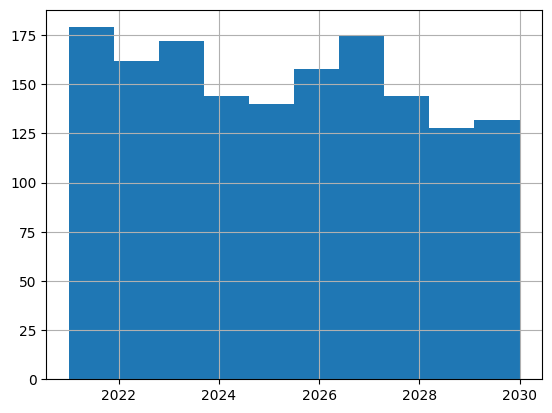

In [77]:
df_wic.year.hist()

In [78]:
df_wic.sex.value_counts()

Female    947
Male      587
Name: sex, dtype: int64

<AxesSubplot:>

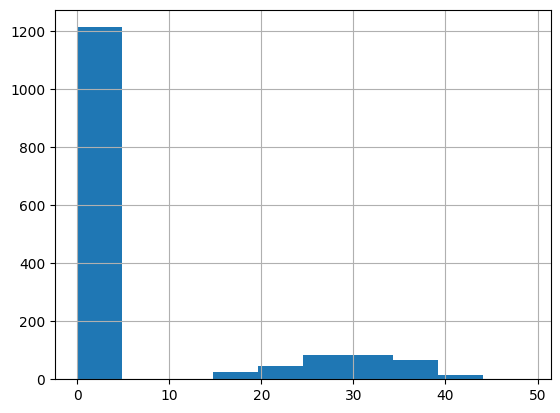

In [79]:
df_wic.age.hist()

In [80]:
df_wic.relation_to_household_head.value_counts()

Biological child               809
Reference person               241
Other nonrelative              185
Grandchild                     165
Other relative                  49
Sibling                         32
Roommate                        21
Opp-sex spouse                  19
Opp-sex partner                  5
Adopted child                    4
Same-sex spouse                  1
Same-sex partner                 1
Stepchild                        1
Child-in-law                     1
Institutionalized GQ pop         0
Parent                           0
Foster child                     0
Parent-in-law                    0
Noninstitutionalized GQ pop      0
Name: relation_to_household_head, dtype: int64